In [1]:
#Notations : p prime, MesF Mestre test function, fnu inertia degree, lam = lambda

#MesF : Mestre test function. For these algorithms to be correct, MesF must be 
# Complactly supported in [-1,1], even function, positive Fourier transform

Mes(x) = (1-x)*cos(pi*x)+sin(pi*x)/pi


#Algorithms for the sums
#Algorithms for the sums
#Algorithms for the sums
#Algorithms for the sums
#Algorithms for the sums
#Algorithms for the sums

def liste_premier_lambda(lam):                         # Input : lam 
    C = floor(exp(lam))                                # Output : List of primes <= exp(lam)
    return prime_range(C+1)


#Only over Q
def Mestre_somme_premier_lambda(p,lam,MesF):            #Local Mestre sum          
    S,m,x = 0,1,p                                       
    while x<= exp(lam):
        S += (floor(2*sqrt(x)) * x^(-1) * MesF(m*math.log(p)/lam.numerical_approx())).numerical_approx()
        x *= x
        m += 1
    return numerical_approx(log(p)*S)


   
#Only works over Q.    
def Mestre_somme_lambda(lam,MesF):                        # Global Mestre sum 
    Liste = liste_premier_lambda(lam)
    Somme = 0
    for p in Liste:
        Somme += (Mestre_somme_premier_lambda(p,lam,MesF)).numerical_approx()
    return 2*Somme                                        #In the final formula this sum must be multiplied by two

#Only work over Q                                           
def somme_mult_badprimes_lambda(p,lam,MesF):                 # Local sum in the case of p|N i.e multiplicative reduction      
    S = p^(-1)*MesF(math.log(p)/lam.numerical_approx())
    m = 2
    x = p^2
    while x <= exp(lam):
        S= (S + x^(-1)*MesF(m*math.log(p)/lam.numerical_approx())).numerical_approx()
        x= p * x
        m = m+1
    return numerical_approx(log(p)*S)

                                                              #Additive reduciton : the sum is 0 we don't code it


#Only over Q - uses the Wil bound
#input : lambda, MesF,two lists of bad primes : one for multiplicative red and one for additive red



def Mestre_somme_withbadprimes_lambda(lam,MesF,mult_badprimes,add_badprimes): #Global sum with mult and add reductions
    Liste = liste_premier_lambda(lam)                                              
    Somme = 0
    for p in Liste:                                                  
        if p in mult_badprimes :                               #Correct sum for multiplicative red
            Somme += somme_mult_badprimes_lambda(p,lam,MesF)
        elif p in add_badprimes:
            Somme += 0                                         #Do nothing for additive reduction
        else:
            Somme += Mestre_somme_premier_lambda(p,lam,MesF)   # In case of good reduction
    return 2*Somme                                             #factor 2 in the final sum - present in Mestre explicit formula                                                           




#remark : the list we give in input are lists of primes CONTAINED in the set of primes of bad reduction.
#The algorithm stays worect if we forgot some primes of bad reduction, but the result is lee precise 
# that is to say the final bound is lwoer that it would be



#Function defining the integrals terms appearing. Not correct if MesF is not completly supported in [-1,1]
#Integral term algorithm
#Integral term algorithm
#Integral term algorithm
#Integral term algorithm
#Integral term algorithm
#Integral term algorithm
#Integral term algorithm

def Value_Phi_0(MesF):      #The integral term which will be multiplied by the rank. Fourier transform of MesF eval at 0
    return 2*numerical_integral(MesF(x),0,1)[0]


Constant_Mlambda = 2*math.log(2*pi)     #constant appearing in the formula, let's stock it



def Mlambda2(lam,MesF):
    aux(x) = MesF(x) * exp(-lam*x)/(1-exp(-lam*x)) - MesF(0) * exp(-lam*x)/(lam*x)
    a = numerical_integral(aux(x),0,1)[0]
    b = numerical_integral(exp(-x)/x, lam.numerical_approx() , Infinity )[0] #depends on lam, cannot be stocked :(
    return 2*(lam*a - MesF(0)*b) +   MesF(0)*Constant_Mlambda       #still a foctor two at the end, like the sum




#Combining integral terms and the rest
#Combining integral terms and the rest
#Combining integral terms and the rest
#Combining integral terms and the rest
#Combining integral terms and the rest
#Combining integral terms and the rest

#Only over Q
def minorant_conducteur_lambda(lam,MesF,rk):      #Without knowing anything on the conductor
    K = lam * rk * Value_Phi_0(MesF)+Mlambda2(lam,MesF)-Mestre_somme_lambda(lam,MesF)
    return exp(K)

#Only over Q
def minorant_conducteur_lambda_withbadprimes(lam,MesF,rk,mult_badprimes,add_badprimes): #knowing some primes of add and mul reduction
    K = lam * rk *Value_Phi_0(MesF) + Mlambda2(lam,MesF)-Mestre_somme_withbadprimes_lambda(lam,MesF,mult_badprimes,add_badprimes)
    return exp(K)

























#In number fields, without knowing anything about the bad primes, using only the Weil bound
#Algorithm for sums
#Algorithm for sums
#Algorithm for sums
#Algorithm for sums
#Algorithm for sums

def somme_premier_degre_ramifi(p,lam,MesF,fnu):      #Uses the Serre-Weil bound. 
                                                    #Local sums ofver a prime pp avoce p, with inertia degree fnu
    q = p^fnu
    S,m,x = 0,1,q
    while x<= exp(lam):
        S += (floor(2*sqrt(x)) * x^(-1) * MesF(m*math.log(q)/lam.numerical_approx())).numerical_approx()
        x *=  q
        m +=  1
    return numerical_approx(log(q)*S)



def Mestre_somme_lambda_nbfield(lam,MesF,K):        #Combines the local sums previously defined            
    Liste = liste_premier_lambda(lam)
    Somme = 0
    for p in Liste:
        for pp in K.primes_above(p):
            fnu = pp.residue_class_degree()
            Somme += (somme_premier_degre_ramifi(p,lam,MesF,fnu)).numerical_approx()
    return 2 * Somme                                # The usual factor 2 at the end







#With Frobenius

def Somme_Frob(p,fnu,lam,MesF,Frob):            #We get the exact local sums, given a certain Frobenius
    q = p^fnu 
    delt = Frob^2-4*q
    alpha = (Frob-I*sqrt(-delt))/2
    beta = (Frob+I*sqrt(-delt))/2
    a = alpha
    b = beta
    Somme = 0
    m = 1
    x = q
    while x <= exp(lam):
        Somme += (MesF(m*math.log(q)/numerical_approx(lam))*(a+b)/x).numerical_approx()   # compute the sum
        a     *= alpha                                             # powers of roots of Frob increment
        b     *= beta
        x     *= q                                                 # denominator of the sum increment
        m     += 1
    finalSomme = Somme * math.log(q)                           
    return numerical_approx(finalSomme)


def Mini_Somme_Frob(p,fnu,lam,MesF):       #Compare the possible sums in function of the Forbenius. Take the lowest of them
                                            #PS : lowest not in absolute value. This is expected to be a negative number
    bound = floor(2*sqrt(p^fnu))
    MinFrob = - bound
    MinSomme = Somme_Frob(p,fnu,lam,MesF,MinFrob)
    for Frobenius in range(-bound+1,bound+1):
        C = Somme_Frob(p,fnu,lam,MesF,Frobenius)
        if C < MinSomme:
            MinFrob = Frobenius
            MinSomme = C
    return (MinFrob,MinSomme)


def Mestre_Somme_Frob(lam,MesF,K):
    Listeprime = liste_premier_lambda(lam)
    BigSomme = 0
    ListeFrob = []
    for p in Listeprime:
        for prims in K.primes_above(p):
            fnu = prims.residue_class_degree()
            frobenius,value = Mini_Somme_Frob(p,fnu,lam,MesF)
            BigSomme += value.numerical_approx()
            ListeFrob += [(p,fnu,frobenius)]
    return (ListeFrob,2*BigSomme)             #factor 2 in the explicit formulas

def Somme_liste_Frob(lam,MesF,lisfrobs):   #Input: the list of primes considered, with their fnu and attributed frobenius
    Somme = 0
    for k in lisfrobs:
        p,fnu,Frob = k
        Somme += (Somme_Frob(p,fnu,lam,MesF,Frob)).numerical_approx()
    return 2*Somme







def minorant_conducteur_lambda_nbfield(lam,MesF,rk,K):     # Input : K a field. Uses the Serre-Weil bound
    n = K.absolute_degree()
    disc = K.absolute_discriminant()
    lowbound = lam * rk * Value_Phi_0(MesF) + n * Mlambda2(lam,MesF) - Mestre_somme_lambda_nbfield(lam,MesF,K)
    return exp(lowbound)/(disc^2)



def minorant_conducteur_nbfield_Frobenius(lam,MesF,rk,K):   #This calculate the optimal liste of Frobeniuses, d
                                                            #Does not use the Serre-Weil bound ! 
    n = K.absolute_degree()
    discri = K.absolute_discriminant()
    Listefrobs, MestreSomme = Mestre_Somme_Frob(lam,MesF,K)
    lowbound = lam * rk * Value_Phi_0(MesF) + n * Mlambda2(lam,MesF) + MestreSomme
    return Listefrobs , exp(lowbound)/(discri^2)


def minorant_liste_Frob(lam,MesF,rk,K,lisfrobs):        #Where the input is the list of Frobenius traces.
    n = K.absolute_degree()
    discri = K.absolute_discriminant()
    Mestresomme = Somme_liste_Frob(lam,MesF,lisfrobs)
    lowbound = lam * rk * Value_Phi_0(MesF) + n * Mlambda2(lam,MesF) + Mestresomme
    return  exp(lowbound)/(discri^2)
   


In [2]:
# here are the optimization algorithm
#fonction test returns the quare convolu of a0 + a1.cos(2 pi x) + a2.cos(4 pi x) + a3.cos(6 pi x) + m0.Mestre(x)

def fonctiontest(a0,a1,a2,a3,a4): #output convolution square of a0 + a1cos(2pix) + a2cos(4pix) + a3cos(6pix) +a4cos(pix)sur [-1/2,1/2]
    norm=sqrt(a0^2+1/2*(a1^2+a2^2+a3^2+a4^2) +2*(2/pi*a4*(a0+a1/3-a2/15+a3/35)))
    b0,b1,b2,b3,b4 = a0/norm,a1/norm,a2/norm,a3/norm,a4/norm
    aux(x)=b0^2*g00(x)+b1^2*g11(x)+b2^2*g22(x)+b3^2*g33(x)+b4^2/2*Mes(x)+2*(b0*b1*g01(x)+b0*b2*g02(x)+b0*b3*g03(x)+b1*b2*g12(x)+b1*b3*g13(x)+b2*b3*g23(x)+b0*b4*gm0(x)+b1*b4*gm1(x)+b2*b4*gm2(x)+b3*b4*gm3(x))
    return aux

g00(x) = -x + 1
g01(x) = 1/2*sin(2*pi*x)/pi
g02(x) = -1/4*sin(4*pi*x)/pi
g03(x) = 1/6*sin(6*pi*x)/pi

g11(x)= 1/8*(2*pi*cos(2*pi*x) - sin(2*pi*x))/pi + 1/8*(2*(pi - 2*pi*x)*cos(2*pi*x) - sin(2*pi*x))/pi 
g12(x)= 1/3*sin(4*pi*x)/pi - 1/6*sin(2*pi*x)/pi
g13(x)= -3/16*sin(6*pi*x)/pi + 1/16*sin(2*pi*x)/pi

g22(x)= 1/16*(4*pi*cos(4*pi*x) - sin(4*pi*x))/pi + 1/16*(4*(pi - 2*pi*x)*cos(4*pi*x) - sin(4*pi*x))/pi
g23(x)= 3/10*sin(6*pi*x)/pi - 1/5*sin(4*pi*x)/pi

g33(x)= 1/24*(6*pi*cos(6*pi*x) - sin(6*pi*x))/pi + 1/24*(6*(pi - 2*pi*x)*cos(6*pi*x) - sin(6*pi*x))/pi

gm0(x) = cos(pi*x)/pi + 1/pi
gm1(x) = (1/6)*(sin(3/2*pi + 2*pi*x) + 3*sin(1/2*pi + 2*pi*x))/pi + 1/3*cos(pi*x)/pi
gm2(x) = (1/30)*(3*sin(5/2*pi + 4*pi*x) + 5*sin(3/2*pi + 4*pi*x))/pi - (1/15)*cos(pi*x)/pi
gm3(x) = (1/70)*(5*sin(7/2*pi + 6*pi*x) + 7*sin(5/2*pi + 6*pi*x))/pi + (1/35)*cos(pi*x)/pi



def optimisitionfonction(lam,rk,K,lisfrobs,a0,a1,a2,a3,m0,pas,nb_iteration): #important condition : a0²+1/2(a1²+a2²+a3²+m0² 
    discri = K.absolute_discriminant()  #Notice I need to know the frobeniuses         + 2/pi(a0b0+a1b0/3 -a2b0/15 +a3b0/35)
    C00 = math.log(discri^2*minorant_liste_Frob(lam,g00,rk,K,lisfrobs))     #coefficient de ma fonction en a0,a1,a2,a3
    C01 = math.log(discri^2*minorant_liste_Frob(lam,g01,rk,K,lisfrobs)) 
    C02 = math.log(discri^2*minorant_liste_Frob(lam,g02,rk,K,lisfrobs)) 
    C03 = math.log(discri^2*minorant_liste_Frob(lam,g03,rk,K,lisfrobs)) 
    C11 = math.log(discri^2*minorant_liste_Frob(lam,g11,rk,K,lisfrobs)) 
    C12 = math.log(discri^2*minorant_liste_Frob(lam,g12,rk,K,lisfrobs)) 
    C13 = math.log(discri^2*minorant_liste_Frob(lam,g13,rk,K,lisfrobs)) 
    C22 = math.log(discri^2*minorant_liste_Frob(lam,g22,rk,K,lisfrobs)) 
    C23 = math.log(discri^2*minorant_liste_Frob(lam,g23,rk,K,lisfrobs)) 
    C33 = math.log(discri^2*minorant_liste_Frob(lam,g33,rk,K,lisfrobs))
    GM0 = math.log(discri^2*minorant_liste_Frob(lam,gm0,rk,K,lisfrobs))
    GM1 = math.log(discri^2*minorant_liste_Frob(lam,gm1,rk,K,lisfrobs))
    GM2 = math.log(discri^2*minorant_liste_Frob(lam,gm2,rk,K,lisfrobs))
    GM3 = math.log(discri^2*minorant_liste_Frob(lam,gm3,rk,K,lisfrobs))
    GG  = math.log(discri^2*minorant_liste_Frob(lam,Mes,rk,K,lisfrobs))
    b0 = a0
    b1 = a1
    b2 = a2
    b3 = a3
    b4 = m0
    for i in range(nb_iteration):
        tempvalue = (b0^2*C00+b1^2*C11+b2^2*C22+b3^2*C33+b4^2/2*GG+2*(b0*b1*C01+b0*b2*C02+b0*b3*C03+b1*b2*C12+b1*b3*C13+b2*b3*C23+b0*b4*GM0 +b1*b4*GM1 +b2*b4*GM2 +b3*b4*GM3)).numerical_approx() 
        gradient0 = ((2*b0*C00+2*b1*C01+2*b2*C02+2*b3*C03+2*b4*GM0) -tempvalue*(2*b0 + 2/pi*b4)).numerical_approx()    #gradient of the function
        gradient1 = ((2*b0*C01+2*b1*C11+2*b2*C12+2*b3*C13+2*b4*GM1)  -tempvalue*(b1  + 2/(3*pi)*b4)).numerical_approx()      
        gradient2 = ((2*b0*C02+2*b1*C12+2*b2*C22+2*b3*C23+2*b4*GM2)  -tempvalue*(b2  - 2/(15*pi)*b4)).numerical_approx()     
        gradient3 = ((2*b0*C03+2*b1*C13+2*b2*C23+2*b3*C33+2*b4*GM3)  -tempvalue*(b3  + 2/(35*pi)*b4)).numerical_approx() 
        gradient4 = ((2*b4*GG+2*b0*GM0+2*b1*GM1+2*b2*GM2+2*b3*GM3)  -tempvalue*(2*b4 + 2/pi*b0 + 2/(3*pi)*b1 - 2/(15*pi)*b2 +2/(35*pi)*b3)).numerical_approx() 
        normgrad = sqrt(gradient0^2+gradient1^2+gradient2^2+gradient3^2+gradient4^2)
        c0=(b0+gradient0*pas/normgrad).numerical_approx()                               # We move the original coordinates in the direction of the gradient 
        c1=(b1+gradient1*pas/normgrad).numerical_approx()                                             
        c2=(b2+gradient2*pas/normgrad).numerical_approx() 
        c3=(b3+gradient3*pas/normgrad).numerical_approx() 
        c4=(b4+gradient4*pas/normgrad).numerical_approx() 
        norm=sqrt(c0^2+1/2*(c1^2+c2^2+c3^2+c4^2) +2*(2/pi*c4*(c0+c1/3-c2/15+c3/35))) #final renormalisation to have F(0)=1                                      
        b0=(c0/norm).numerical_approx()
        b1=(c1/norm).numerical_approx()
        b2=(c2/norm).numerical_approx()
        b3=(c3/norm).numerical_approx()
        b4=(c4/norm).numerical_approx()
    finavalue=b0^2*C00+b1^2*C11+b2^2*C22+b3^2*C33+b4^2/2*GG+2*(b0*b1*C01 + b0*b2*C02 + b0*b3*C03 + b1*b2*C12 + b1*b3*C13 + b2*b3*C23 + b0*b4*GM0 + b1*b4*GM1 + b2*b4*GM2 + b3*b4*GM3 )
    return (b0,b1,b2,b3,b4,(1/discri^2)*exp(finavalue))


# To find the best lambda with 0.01 precision:
def optimi_lam1(MesF,rk,K):
    earlylam = 1
    earlyval = minorant_conducteur_lambda_nbfield(earlylam,MesF,rk,K) 
    while minorant_conducteur_lambda_nbfield(earlylam + 1,MesF,rk,K) > earlyval:
        earlyval = minorant_conducteur_lambda_nbfield(earlylam + 1,MesF,rk,K)
        earlylam = earlylam + 1
    midlam = earlylam-0.9
    midval = minorant_conducteur_lambda_nbfield(midlam,MesF,rk,K)
    while minorant_conducteur_lambda_nbfield(midlam + 0.1,MesF,rk,K) > midval:
        midval = minorant_conducteur_lambda_nbfield(midlam + 0.1,MesF,rk,K)
        midlam = midlam + 0.1
    finlam = midlam-0.09
    finval = minorant_conducteur_lambda_nbfield(finlam,MesF,rk,K)
    while minorant_conducteur_lambda_nbfield(finlam+0.01,MesF,rk,K) > finval:
        finval = minorant_conducteur_lambda_nbfield(finlam+0.01,MesF,rk,K)
        finlam += 0.01
    return (finlam)

def optimi_lam(MesF,rk,K):
    midlam = 1
    midval = minorant_conducteur_nbfield_Frobenius(midlam,MesF,rk,K)[1] 
    while minorant_conducteur_nbfield_Frobenius(midlam + 0.1,MesF,rk,K)[1] > midval:
        midval = minorant_conducteur_nbfield_Frobenius(midlam + 0.1,MesF,rk,K)[1]
        midlam = midlam + 0.1
    finlam = midlam-0.09
    finval = minorant_conducteur_nbfield_Frobenius(finlam,MesF,rk,K)[1]
    while minorant_conducteur_nbfield_Frobenius(finlam+0.01,MesF,rk,K)[1] > finval:
        finval = minorant_conducteur_nbfield_Frobenius(finlam+0.01,MesF,rk,K)[1]
        finlam += 0.01
    return (finlam)
        

In [7]:
f = open("deg 10 fields.sage","r")
deg = 10

def liste_file():
    listeofthefields = []
    for s in f.readlines():
        if s[0] =="[" :
            string_poly =  s.split('[')[2].split(']')[0]
            poly = [ ZZ(n) for n in string_poly.split(", ")]
            listeofthefields += [poly]
    return listeofthefields

poly_fields = liste_file()



ZZx.<x> = ZZ[]
Liste_lambda_discri  = []
Liste_lambda_bounds  = []
Liste_discri_bounds  = []
Liste_field_bounds   = []
for coefficients in poly_fields:
    poly = ZZx(coefficients)
    J.<a> = NumberField(poly)
    rootdisc = float(abs(J.absolute_discriminant())^(1/deg))
    optlam = optimi_lam1(Mes,0,J)
    low_bound = minorant_conducteur_lambda_nbfield(optlam,Mes,0,J)^(1/deg)
    Liste_field_bounds  += [(poly,low_bound)]
    Liste_discri_bounds += [(rootdisc,low_bound)]
    Liste_lambda_bounds += [(optlam,low_bound)]
    Liste_lambda_discri += [(rootdisc,optlam)]
    print(rootdisc)

6.793410304262219
6.802944280879974
6.81093664096339
6.811731683174473
6.816791645599666
6.8277185750061316
6.828764087547895
6.84011369337701
6.84077497823615
6.846116081216021
6.848241144703171
6.851599308028449
6.855231841556473
6.855654600401045
6.866629889367551
6.875830368764839
6.876567911367829
6.8875254923718
6.896061614542866
6.896595247638304
6.898747431624968
6.904084435510339
6.906530860589218
6.916905488891861
6.921874997052248
6.9263443531319595
6.942925969500351
6.947767788044984
6.948791605138262
6.94981453173223
6.949933740182654
6.952248536059435
6.963386317035786
6.979032566498681
6.980110020543245
6.986337896261107
6.988844777447245
6.990450416315003
6.997004910977267
7.000676715643615
7.003487378061013
7.004146007934928
7.006889457349474
7.015532830067994
7.019474181461017
7.019616427252213
7.020733838394509
7.021950084506058
7.024919935619684
7.025714153345737
7.027929982639032
7.029462755782219
7.038690292744222
7.039267027501931
7.043200405729075
7.051195015545

7.607063464708203
7.6082350486975905
7.608921664869174
7.610183932056654
7.61049263938615
7.610774113730422
7.613101528991353
7.613397729747838
7.613684607530868
7.61458877980591
7.614612746703841
7.615472150323452
7.616547294497463
7.61693176248948
7.616940652161313
7.617439607913926
7.619911534475609
7.620769336678692
7.620873600376783
7.621236252600848
7.621384403367872
7.621715700654662
7.622116513706366
7.623405746236194
7.623861428747382
7.624095959299756
7.6256099870014715
7.626614289699221
7.6273821302097105
7.628163900612499
7.628164523796364
7.629822631101625
7.630836310741815
7.631716134548583
7.633326282294024
7.633555350257539
7.634658155692042
7.634895599352895
7.63836182576384
7.638519945564788
7.638837144679531
7.6396272326503825
7.639930652870689
7.640746961790726
7.641358924222537
7.642084445549404
7.642458307417756
7.642661948119296
7.644755316553889
7.645964623523361
7.64621096204018
7.648013089500366
7.648015538012841
7.648695634054502
7.650502253414355
7.650682279

7.84121062919288
7.841398591453437
7.842277331824553
7.842326711592709
7.842408092442307
7.84263732356248
7.8431694277710395
7.843331296373495
7.843341498178979
7.843445095823639
7.8436568353032525
7.8437945942664715
7.844026882061437
7.844036815995431
7.844422580981807
7.844531387722795
7.844805750908373
7.845092703799448
7.845341967092708
7.845788877812891
7.84601080601393
7.846598727409373
7.846889834079436
7.847713622607987
7.848262548136167
7.848312850470343
7.848574262049193
7.848683002264932
7.848780080571289
7.848816598921656
7.848872742902526
7.848887739849469
7.848929783707583
7.849248068464176
7.849291249656111
7.849820427987438
7.849915349455378
7.849966759833304
7.850088595364349
7.850135033194059
7.850318078676229
7.85040563285466
7.8504620490197246
7.850560843572893
7.850775365522708
7.850775365522708
7.851107677060801
7.8515839066509345
7.851753748073049
7.851922533912619
7.85201284992825
7.8523631273897045
7.853310881521377
7.853310881521377
7.853416802189622
7.8539134

7.948024663018169
7.948783764200632
7.948864343449312
7.948985387161856
7.9490742544870905
7.949148237480009
7.949883478827397
7.950729030443341
7.950852150063499
7.95103080295887
7.951241685313643
7.951429279699133
7.951500469516206
7.951519170087379
7.951712664669388
7.9517587822108835
7.952009559326514
7.9529294071722045
7.952959404626811
7.953050218894495
7.953512897239918
7.953568944734177
7.953593259874494
7.9536981205763055
7.953752677449009
7.953776604481407
7.95380737223922
7.953905638530111
7.953957836091392
7.954279981652657
7.954487317553258
7.954509265538325
7.954681909661293
7.955060708575242
7.955079515013379
7.955082440109834
7.955819591197791
7.9558689601054455
7.955918501658332
7.955930324002164
7.9561150242646805
7.956270358953345
7.956445701379133
7.956491558523993
7.956569319054376
7.956638898186958
7.956812376961807
7.957115522045849
7.957170626888706
7.957540548174389
7.957597969653129
7.958350092189359
7.958498419342567
7.958789580766999
7.95898594544897
7.95899

8.036220249048105
8.036365100656605
8.03645309029133
8.036455388902894
8.036848849173222
8.036996091920088
8.03715346530554
8.03743362246336
8.0375118233316
8.038280126177781
8.038441879048507
8.038558476068827
8.038605160843494
8.038667093315564
8.038819016866926
8.03887912001201
8.03893378023383
8.039055331926303
8.039155562080989
8.039322369204475
8.039605403903657
8.039786338456247
8.040004835686739
8.040071234178628
8.040314043066957
8.040640337486586
8.040804774478946
8.040861368743
8.041448589937758
8.04149039895089
8.041511086534374
8.04157014698504
8.041737210626442
8.04191240340716
8.04206299291941
8.042196755690423
8.042562316598277
8.04260660852149
8.042893952294678
8.04289476814173
8.043029076660083
8.043551626216438
8.043562403876285
8.043614519371452
8.043726098350872
8.04398096042492
8.043997844586745
8.044005748999464
8.044021756178475
8.044066687079061
8.044092087355864
8.044336919787494
8.045109519255167
8.045146476460994
8.045154952909359
8.045585618968373
8.0459703

8.10775769865137
8.107855618358633
8.107946111243319
8.108046846548907
8.108349230456566
8.109009162623519
8.109145345477025
8.109305643323149
8.109505924773917
8.109598120189336
8.109868999072356
8.109983947039593
8.110172284698672
8.110487802024917
8.110536748100182
8.110646116455682
8.110711496192424
8.110837474208395
8.110950642041278
8.11101339210928
8.11103580639597
8.111154756597015
8.111243175126761
8.111604110575655
8.111828558917786
8.111910786184113
8.112013630720305
8.11212656289275
8.112471761956805
8.11250843375337
8.112682195640451
8.112845271919886
8.113058971988282
8.113297862204597
8.113342227519576
8.113374429769697
8.113444411344261
8.113599265994695
8.11365897477576
8.113752937912126
8.11399626108712
8.114061835788924
8.114203001766686
8.114295339654102
8.114610883711062
8.114733704751831
8.114797200028534
8.114911282094438
8.1149736967888
8.115290244864271
8.115942944628575
8.1162511685282
8.11643957793095
8.116691217149794
8.116850535911922
8.116850535911922
8.11

8.17304824688518
8.173525254121635
8.173542312968591
8.17393394814414
8.173936958859002
8.174101640317302
8.174316207009051
8.17440519261577
8.174442044237468
8.174456440127383
8.174482221097641
8.174490551376579
8.174491531223916
8.174497737308197
8.174586268940844
8.174612087942496
8.17463294088542
8.17468221872247
8.175104848102395
8.175376257122135
8.175966622675904
8.176097427708974
8.176207756421828
8.176345248639104
8.176456263569843
8.176480685058685
8.176549304153106
8.17700962966861
8.177185643056202
8.17722873834704
8.177236243982243
8.17736700091633
8.177448541526669
8.177623258648302
8.177687305064916
8.177764077776402
8.177773463149087
8.177848660008866
8.17785590439589
8.177941801392922
8.17795180226468
8.17795703064386
8.178164904323724
8.178166711893068
8.178177681891954
8.178247755501221
8.178312742816665
8.17834310798583
8.178411690432084
8.178691220718717
8.178801258760119
8.178804001189818
8.178825443272887
8.178826189468298
8.17919047765184
8.17931044241297
8.1794

8.228459623280765
8.22870245770707
8.228742285818289
8.228877754544694
8.22906766737932
8.22912369602969
8.229148683803563
8.229189474762999
8.229286707237566
8.229522553821763
8.2295523841374
8.229623770555603
8.22992103852216
8.229941576931617
8.230107711283406
8.230117849151176
8.23015472792239
8.230173328652233
8.23031355787286
8.230602105466978
8.230609640587057
8.230657587903728
8.230898196872511
8.231074132010574
8.231097065142405
8.231115269621798
8.231225194558595
8.231283803568138
8.231324207710419
8.23138715547681
8.231475858357566
8.231526066789238
8.23177036777621
8.231781247207364
8.231866944851468
8.232099361782002
8.232113173011923
8.232135331366738
8.232444248346145
8.23250685885461
8.232809023785983
8.233014948101413
8.233152419246554
8.233242951859488
8.233286697928477
8.233374795776214
8.23346028330184
8.233593088416374
8.233684138612494
8.23379815219431
8.234065570473533
8.234356706761723
8.234363059038824
8.23441630703687
8.234463267039182
8.234739945454049
8.2348

8.28013682506208
8.280137439976613
8.28057647804899
8.280577545030365
8.28083538716538
8.280940231150444
8.281032742545817
8.281063117116393
8.281215014238915
8.281445126626222
8.281488407584042
8.281492562662844
8.281548327757266
8.281644357810821
8.281657352924842
8.281663571568215
8.281793942767653
8.281895948229053
8.281965096970476
8.282545470733595
8.282574758548447
8.282607512434085
8.282758883434312
8.282893475571273
8.282993519667075
8.283099870801493
8.283110481920431
8.283372363876333
8.283520591058716
8.283795222241308
8.284138870314296
8.284197176086586
8.2844412833775
8.284490545986401
8.284538897508716
8.284563214293186
8.284663405049933
8.284701958138921
8.284704153260789
8.284718343107121
8.284761007595433
8.28481000565815
8.284925577502404
8.284981227958632
8.285236749597548
8.285324564621673
8.28533524687072
8.285562226504096
8.285573300483662
8.285734717140382
8.285814522603333
8.285828053257655
8.285835150959144
8.285856463290669
8.28589344173669
8.285995778181949


8.323726064696201
8.324069071319734
8.324158200545806
8.324176744907625
8.324307879922966
8.324320148649687
8.324343252303922
8.324358373076043
8.324417631490743
8.32442578207817
8.324427540866012
8.324499772789625
8.324656523045762
8.324692912275049
8.324941689210325
8.325004344433095
8.325205282357423
8.325256123169478
8.325404441572028
8.325430724366761
8.325459091086666
8.325567778935001
8.32558322935645
8.325589220266766
8.325624145138306
8.325740207636963
8.32574762866952
8.325886580607433
8.325894816568665
8.326032205972234
8.326180107777782
8.326185421972196
8.326599845510335
8.326634592964174
8.326732346181137
8.327324683424521
8.3275517415135
8.327724855210795
8.327792933980156
8.327809427464985
8.327850748906819
8.327969489574453
8.328012621761772
8.328134395299433
8.328561162178348
8.328590742103835
8.328660253333418
8.32869443811888
8.32872393392739
8.32874118812469
8.32877806572789
8.328888234511716
8.328994082786313
8.329066236405946
8.329109878347236
8.329166508102729
8

8.364511668287776
8.364679495268247
8.36477990417888
8.36481420965827
8.364843054608738
8.364860162452418
8.364892338429911
8.365295036415896
8.365363676883218
8.365650525398875
8.36571819289454
8.36576622357226
8.365884591088639
8.366051991561026
8.366154529380681
8.366343247698266
8.366435060709607
8.36650676747774
8.366544981013552
8.366570612147049
8.366587903279363
8.366661541561985
8.366781518698941
8.36682319379608
8.366840606143064
8.366954314629945
8.367036480165405
8.367082642659096
8.36723274124566
8.367278384615505
8.367289530223442
8.367289608818258
8.367401908052251
8.367411447664153
8.367458433052093
8.367474022703913
8.36756872524082
8.367617290434561
8.367710699058946
8.367747214458449
8.367750187654329
8.36779445632249
8.367836695536466
8.367965230403701
8.368002793042972
8.368115531992835
8.36836072734686
8.36846970681749
8.368491424871566
8.36862674241701
8.368668390517719
8.368674067763177
8.368770939176192
8.368928400612882
8.368934830043564
8.368940471896922
8.36

8.403048696277173
8.403081963775866
8.40311452931463
8.403122943362114
8.403226233999952
8.40323081145407
8.403565387274503
8.403603696159745
8.403745144867301
8.403817690249808
8.403875208249827
8.403899746641663
8.403925286813621
8.40393024631435
8.403976467403098
8.40412486941757
8.404129230169232
8.404136240799888
8.404140619667983
8.404298226122801
8.404318999726154
8.404337931441306
8.404487148797251
8.404495643210245
8.404627908439386
8.404635248896229
8.404680814829415
8.404892984689697
8.40490412982183
8.404918592305298
8.404938871509819
8.404973503940843
8.404996968266666
8.405094270279857
8.405104624406462
8.405109329747553
8.405163434451172
8.405258083396678
8.405421291931797
8.405491350512774
8.405593190793272
8.405640329759153
8.405652619785444
8.405909731391048
8.406176495676855
8.40624237670609
8.406476797049077
8.406583384286339
8.406592275982112
8.406668402029299
8.406711635405385
8.406836580181947
8.406900574001236
8.406937156955259
8.406951884028672
8.40708979516612

KeyboardInterrupt: 

In [8]:
A = list_plot(Liste_discri_bounds, color='red')
# x : the root discriminant
# y : the bound

B= list_plot(Liste_lambda_bounds, color='red')
# x : lambda
# y : the bound

C = list_plot(Liste_lambda_discri, color='red')
# x : root discriminant
# y : the optimal lambda for "the" field associated to this root discriminant

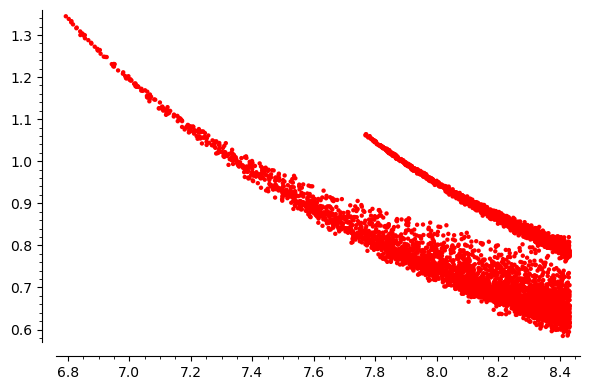

In [9]:
A

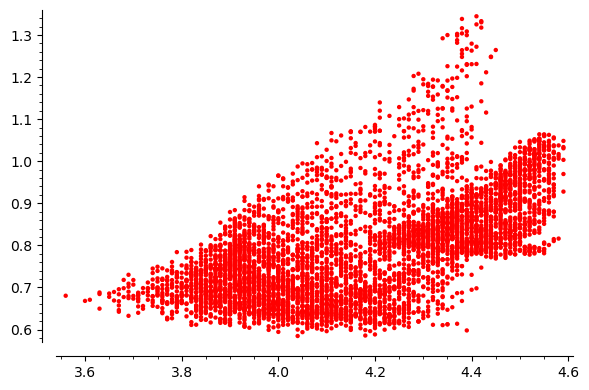

In [10]:
B

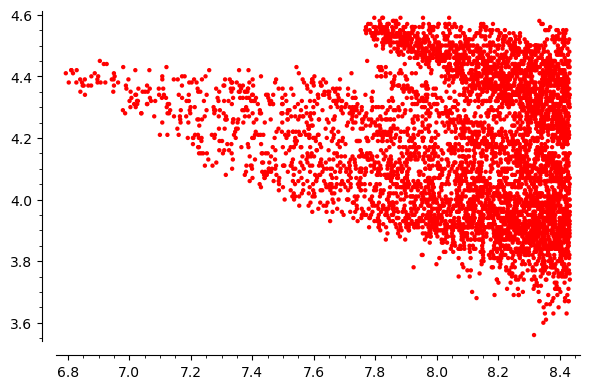

In [11]:
C

In [7]:
K.<a> = NumberField(x^10 - 2*x^9 + 3*x^8 - 5*x^7 + 8*x^6 - 8*x^5 + 8*x^4 - 8*x^3 + 6*x^2 - 3*x + 1)
J.<b> = NumberField(x^10 - x^9 - x^8 + 4*x^7 - 3*x^6 - x^5 + 4*x^4 - 3*x^3 + 2*x - 1)

listeK =  [(3+2*i/50,minorant_conducteur_lambda_nbfield(3+2*i/50,Mes,0,K)) for i in range(50)]
listeJ =  [(3+2*i/50,minorant_conducteur_lambda_nbfield(3+2*i/50,Mes,0,J)) for i in range(50)]



In [8]:
PK = list_plot(listeK, color='red')
PJ = list_plot(listeJ, color='red')

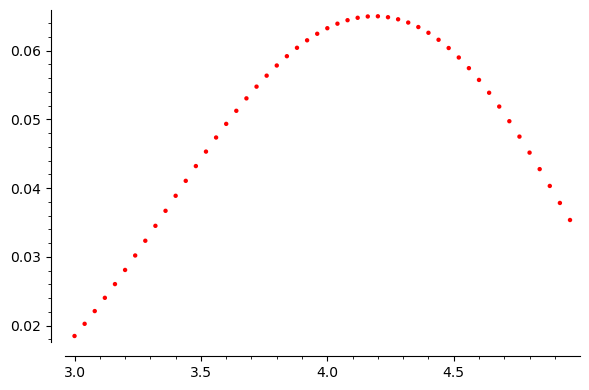

In [9]:
PK

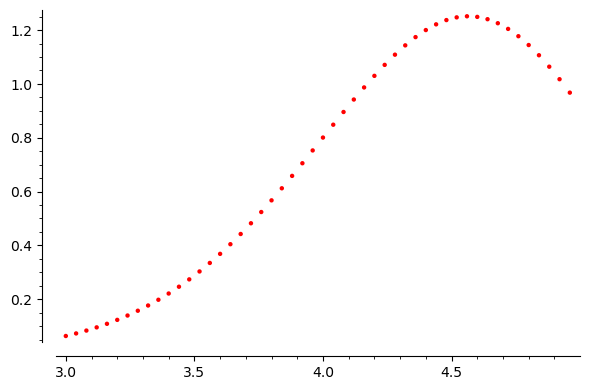

In [10]:
PJ

In [3]:
f = open("deg 10 fields.sage","r")
deg = 10

def isnotintheliste(element,lis):
    for k in lis:
        if element == k:
            return False
    return True
    
    
    
def Liste_of_Galoislabels():
    Galoislabels = []
    for s in f.readlines():
        if s[0] =="[" :
            Label =  s.split('"')[3]
            if isnotintheliste(Label,Galoislabels):
                Galoislabels += [Label]
    return Galoislabels
                             
Galoislabels = Liste_of_Galoislabels()  

In [4]:
f = open("deg 10 fields.sage","r")
deg = 10
   

    
def liste_file_Galoislabels():
    listeofthefields_Galoislabels = []
    for label in Galoislabels:
        listeofthefields_Galoislabels += [[label]]
    for s in f.readlines():
        if s[0] =="[" :
            string_poly =  s.split('[')[2].split(']')[0]
            poly = [ ZZ(n) for n in string_poly.split(", ")]
            templabel = s.split('"')[3]
            for k in listeofthefields_Galoislabels:
                if k[0] == templabel:
                    k += [poly]
    return listeofthefields_Galoislabels

poly_fields_Galoislabels = liste_file_Galoislabels()

In [94]:
Galoislabels

['10T39',
 '10T45',
 '10T43',
 '10T6',
 '10T2',
 '10T22',
 '10T23',
 '10T21',
 '10T37',
 '10T3',
 '10T44',
 '10T1',
 '10T13',
 '10T41',
 '10T14',
 '10T15',
 '10T38',
 '10T11',
 '10T16',
 '10T40',
 '10T5']

In [32]:
f = open("deg 10 fields.sage","r")
deg = 10
   

ZZx.<x> = ZZ[]        
def add_the_infos_by_Galoislabels():
    Liste_with_every_info = []
    for label in Galoislabels:
        listeforthislabel = [label]
        for k in poly_fields_Galoislabels:
            if k[0] == label:
                print(k[0])
                if len(k)<250:
                    for coefficients in k[1:]:
                        poly = ZZx(coefficients)
                        J.<a> = NumberField(poly)
                        rootdisc = float(abs(J.absolute_discriminant())^(1/deg))
                        optlam = optimi_lam1(Mes,0,J)
                        low_bound = minorant_conducteur_lambda_nbfield(optlam,Mes,0,J)^(1/deg)
                        listeforthislabel  += [(poly,rootdisc,optlam,low_bound)]
                else:
                    reducedk = sample(k[1:],250)
                    for coefficients in reducedk:
                        poly = ZZx(coefficients)
                        J.<a> = NumberField(poly)
                        rootdisc = float(abs(J.absolute_discriminant())^(1/deg))
                        optlam = optimi_lam1(Mes,0,J)
                        low_bound = minorant_conducteur_lambda_nbfield(optlam,Mes,0,J)^(1/deg)
                        listeforthislabel  += [(poly,rootdisc,optlam,low_bound)]
        Liste_with_every_info += [listeforthislabel]
    return Liste_with_every_info

TheBigListe = add_the_infos_by_Galoislabels()

10T39
10T45
10T43
10T6
10T2
10T22
10T23
10T21
10T37
10T3
10T44
10T1
10T13
10T41
10T14
10T15
10T38
10T11
10T16
10T40
10T5


In [12]:
def Mestre_somme_lambda_nbfield_limitonprimes(lam,MesF,K,P):        #Combines the local sums previously defined            
    lim_onprimes = min(log(P),lam)
    Liste = liste_premier_lambda(lim_onprimes)
    Somme = 0
    for p in Liste:
        for pp in K.primes_above(p):
            fnu = pp.residue_class_degree()
            Somme += (somme_premier_degre_ramifi(p,lam,MesF,fnu)).numerical_approx()
    return 2 * Somme                                # The usual factor 2 at the end





def minorant_conducteur_lambda_nbfield_limitonprimes(lam,MesF,rk,K,P):     # Input : K a field. Uses the Serre-Weil bound, P bound on primes
    n = K.absolute_degree()
    disc = K.absolute_discriminant()
    lowbound = lam * rk * Value_Phi_0(MesF) + n * Mlambda2(lam,MesF) - Mestre_somme_lambda_nbfield_limitonprimes(lam,MesF,K,P)
    return exp(lowbound)/(disc^2)

In [17]:
Disc_and_bound_By_Galois = []
Plots_Disc_and_bound_By_Galois = []
for k in TheBigListe:
    actuallist = k[1:]
    disc_bound_list = []
    for fieldsinfo in actuallist:
        bound = fieldsinfo[3]
        disc = fieldsinfo[1]
        disc_bound_list += [(disc,bound)]
    Disc_and_bound_By_Galois += [disc_bound_list]
    Plots_Disc_and_bound_By_Galois += [list_plot(disc_bound_list, color='purple')]

In [97]:
Prim = 1
Disc_and_bound_By_Galois_Noprimes = []
Plots_Disc_and_bound_By_Galois_Noprimes = []
for k in TheBigListe:
    actuallist = k[1:]
    disc_bound_list = []
    for fieldsinfo in actuallist:
        poly,disc,optlam = fieldsinfo[0],fieldsinfo[1],fieldsinfo[2]
        K.<a> = NumberField(poly)
        bound_noprime = (minorant_conducteur_lambda_nbfield_limitonprimes(optlam,Mes,0,K,Prim))^(1/deg)
        disc_bound_list += [(disc,bound_noprime*disc^2)]
    Disc_and_bound_By_Galois_Noprimes += [disc_bound_list]
    Plots_Disc_and_bound_By_Galois_Noprimes += [list_plot(disc_bound_list, color='purple')]

In [41]:
Prim = 2
Disc_and_bound_By_Galois_primesupto_2 = []
Plots_Disc_and_bound_By_Galois_primesupto_2 = []
for k in TheBigListe:
    actuallist = k[1:]
    disc_bound_list = []
    for fieldsinfo in actuallist:
        poly,disc,optlam = fieldsinfo[0],fieldsinfo[1],fieldsinfo[2]
        K.<a> = NumberField(poly)
        bound_noprime = (minorant_conducteur_lambda_nbfield_limitonprimes(optlam,Mes,0,K,Prim))^(1/deg)
        disc_bound_list += [(disc,bound_noprime)]
    Disc_and_bound_By_Galois_primesupto_2 += [disc_bound_list]
    Plots_Disc_and_bound_By_Galois_primesupto_2 += [list_plot(disc_bound_list, color='red')]

In [47]:
Prim = 3
Disc_and_bound_By_Galois_primesupto_3 = []
Plots_Disc_and_bound_By_Galois_primesupto_3 = []
for k in TheBigListe:
    actuallist = k[1:]
    disc_bound_list = []
    for fieldsinfo in actuallist:
        poly,disc,optlam = fieldsinfo[0],fieldsinfo[1],fieldsinfo[2]
        K.<a> = NumberField(poly)
        bound_noprime = (minorant_conducteur_lambda_nbfield_limitonprimes(optlam,Mes,0,K,Prim))^(1/deg)
        disc_bound_list += [(disc,bound_noprime)]
    Disc_and_bound_By_Galois_primesupto_3 += [disc_bound_list]
    Plots_Disc_and_bound_By_Galois_primesupto_3 += [list_plot(disc_bound_list, color='red')]

In [48]:
Prim = 5
Disc_and_bound_By_Galois_primesupto_5 = []
Plots_Disc_and_bound_By_Galois_primesupto_5 = []
for k in TheBigListe:
    actuallist = k[1:]
    disc_bound_list = []
    for fieldsinfo in actuallist:
        poly,disc,optlam = fieldsinfo[0],fieldsinfo[1],fieldsinfo[2]
        K.<a> = NumberField(poly)
        bound_noprime = (minorant_conducteur_lambda_nbfield_limitonprimes(optlam,Mes,0,K,Prim))^(1/deg)
        disc_bound_list += [(disc,bound_noprime)]
    Disc_and_bound_By_Galois_primesupto_5 += [disc_bound_list]
    Plots_Disc_and_bound_By_Galois_primesupto_5 += [list_plot(disc_bound_list, color='red')]

In [100]:
Prim = 7
Disc_and_bound_By_Galois_primesupto_7 = []
Plots_Disc_and_bound_By_Galois_primesupto_7 = []
for k in TheBigListe:
    actuallist = k[1:]
    disc_bound_list = []
    for fieldsinfo in actuallist:
        poly,disc,optlam = fieldsinfo[0],fieldsinfo[1],fieldsinfo[2]
        K.<a> = NumberField(poly)
        bound_noprime = (minorant_conducteur_lambda_nbfield_limitonprimes(optlam,Mes,0,K,Prim))^(1/deg)
        disc_bound_list += [(disc,bound_noprime*disc^2)]
    Disc_and_bound_By_Galois_primesupto_7 += [disc_bound_list]
    Plots_Disc_and_bound_By_Galois_primesupto_7 += [list_plot(disc_bound_list, color='red')]

In [103]:
A=Plots_Disc_and_bound_By_Galois_Noprimes[0]
B=Plots_Disc_and_bound_By_Galois_primesupto_2[0]
C=Plots_Disc_and_bound_By_Galois_primesupto_3[0]
D=Plots_Disc_and_bound_By_Galois_primesupto_3[0]
E=Plots_Disc_and_bound_By_Galois_primesupto_7[0]

for i in range(19):
    A += Plots_Disc_and_bound_By_Galois_Noprimes[i+1]
    B += Plots_Disc_and_bound_By_Galois_primesupto_2[i+1]
    C += Plots_Disc_and_bound_By_Galois_primesupto_3[i+1]
    D += Plots_Disc_and_bound_By_Galois_primesupto_5[i+1]
    E += Plots_Disc_and_bound_By_Galois_primesupto_7[i+1]

    

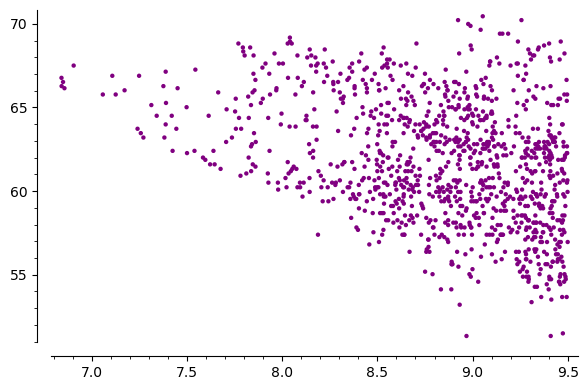

In [99]:
A

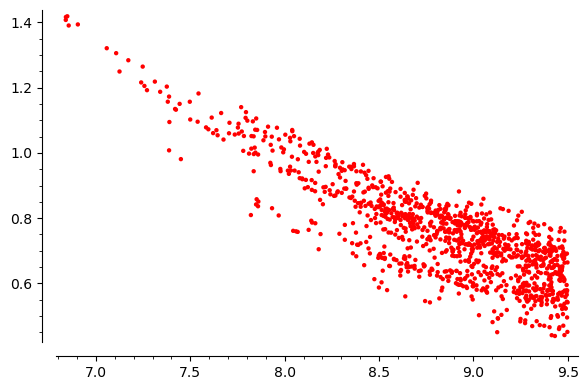

In [52]:
B

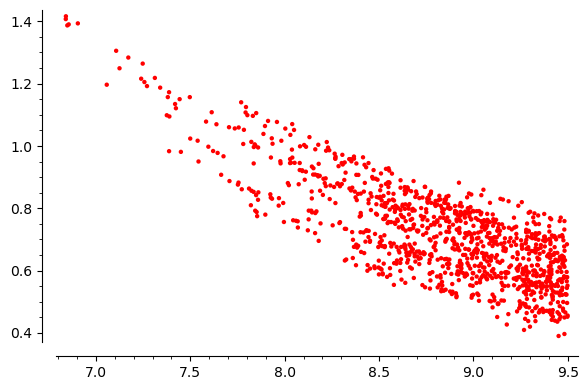

In [53]:
C

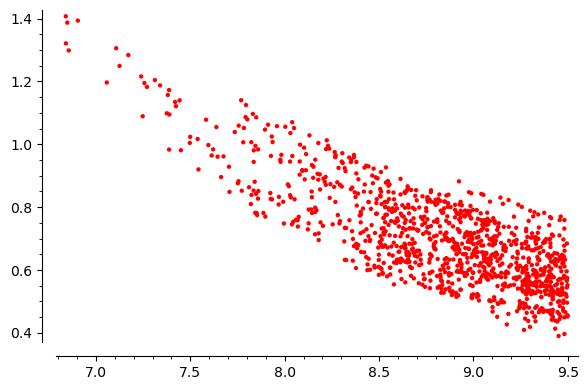

In [54]:
D

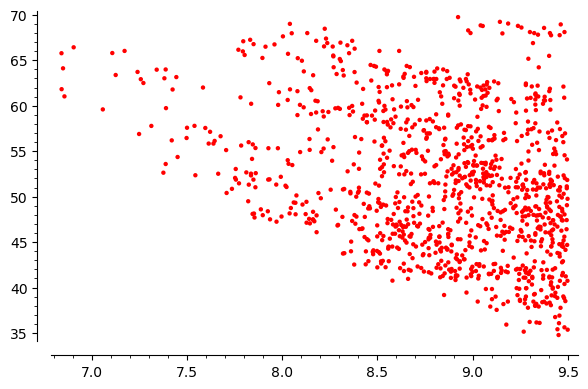

In [104]:
E

In [81]:
Prim = 1
Disc_and_bound_By_Galois_Noprimesv2 = []
Plots_Disc_and_bound_By_Galois_Noprimesv2 = []
for k in TheBigListe:
    actuallist = k[1:]
    disc_bound_list = []
    for fieldsinfo in actuallist:
        poly,disc,optlam = fieldsinfo[0],fieldsinfo[1],fieldsinfo[2]
        K.<a> = NumberField(poly)
        bound_noprime = (minorant_conducteur_lambda_nbfield_limitonprimes(4,Mes,0,K,Prim))^(1/deg)
        disc_bound_list += [(disc,bound_noprime*disc^2)]
    Disc_and_bound_By_Galois_Noprimesv2 += [disc_bound_list]
    Plots_Disc_and_bound_By_Galois_Noprimesv2 += [list_plot(disc_bound_list, color='purple')]

In [83]:
Prim = 2
Disc_and_bound_By_Galois_primesupto_2v2 = []
Plots_Disc_and_bound_By_Galois_primesupto_2v2 = []
for k in TheBigListe:
    actuallist = k[1:]
    disc_bound_list = []
    for fieldsinfo in actuallist:
        poly,disc,optlam = fieldsinfo[0],fieldsinfo[1],fieldsinfo[2]
        K.<a> = NumberField(poly)
        bound_noprime = (minorant_conducteur_lambda_nbfield_limitonprimes(4,Mes,0,K,Prim))^(1/deg)
        disc_bound_list += [(disc,bound_noprime*disc^2)]
    Disc_and_bound_By_Galois_primesupto_2v2 += [disc_bound_list]
    Plots_Disc_and_bound_By_Galois_primesupto_2v2 += [list_plot(disc_bound_list, color='red')]

In [84]:
Prim = 3
Disc_and_bound_By_Galois_primesupto_3v2 = []
Plots_Disc_and_bound_By_Galois_primesupto_3v2 = []
for k in TheBigListe:
    actuallist = k[1:]
    disc_bound_list = []
    for fieldsinfo in actuallist:
        poly,disc,optlam = fieldsinfo[0],fieldsinfo[1],fieldsinfo[2]
        K.<a> = NumberField(poly)
        bound_noprime = (minorant_conducteur_lambda_nbfield_limitonprimes(4,Mes,0,K,Prim))^(1/deg)
        disc_bound_list += [(disc,bound_noprime*disc^2)]
    Disc_and_bound_By_Galois_primesupto_3v2 += [disc_bound_list]
    Plots_Disc_and_bound_By_Galois_primesupto_3v2 += [list_plot(disc_bound_list, color='red')]

In [85]:
Prim = 5
Disc_and_bound_By_Galois_primesupto_5v2 = []
Plots_Disc_and_bound_By_Galois_primesupto_5v2 = []
for k in TheBigListe:
    actuallist = k[1:]
    disc_bound_list = []
    for fieldsinfo in actuallist:
        poly,disc,optlam = fieldsinfo[0],fieldsinfo[1],fieldsinfo[2]
        K.<a> = NumberField(poly)
        bound_noprime = (minorant_conducteur_lambda_nbfield_limitonprimes(4,Mes,0,K,Prim))^(1/deg)
        disc_bound_list += [(disc,bound_noprime*disc^2)]
    Disc_and_bound_By_Galois_primesupto_5v2 += [disc_bound_list]
    Plots_Disc_and_bound_By_Galois_primesupto_5v2 += [list_plot(disc_bound_list, color='red')]

In [86]:
Av2=Plots_Disc_and_bound_By_Galois_Noprimesv2[0]
Bv2=Plots_Disc_and_bound_By_Galois_primesupto_2v2[0]
Cv2=Plots_Disc_and_bound_By_Galois_primesupto_3v2[0]
Dv2=Plots_Disc_and_bound_By_Galois_primesupto_3v2[0]

for i in range(19):
    Av2 += Plots_Disc_and_bound_By_Galois_Noprimesv2[i+1]
    Bv2 += Plots_Disc_and_bound_By_Galois_primesupto_2v2[i+1]
    Cv2 += Plots_Disc_and_bound_By_Galois_primesupto_3v2[i+1]
    Dv2 += Plots_Disc_and_bound_By_Galois_primesupto_5v2[i+1]

    

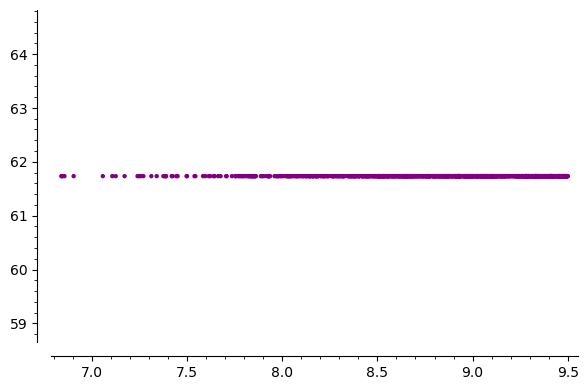

In [87]:
Av2

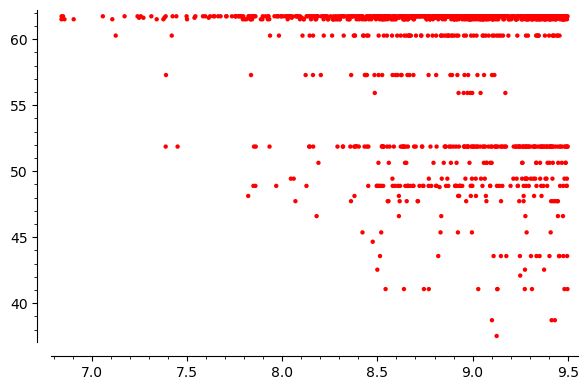

In [88]:
Bv2

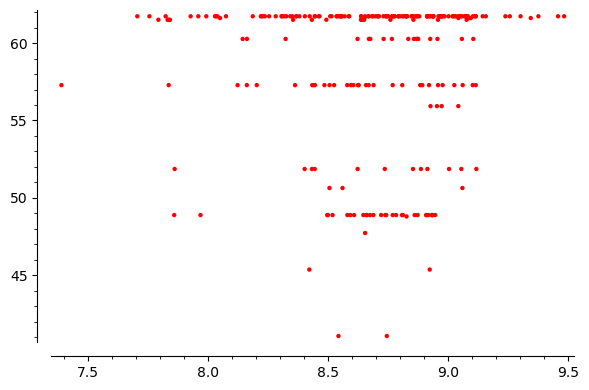

In [96]:
Plots_Disc_and_bound_By_Galois_primesupto_2v2[1]

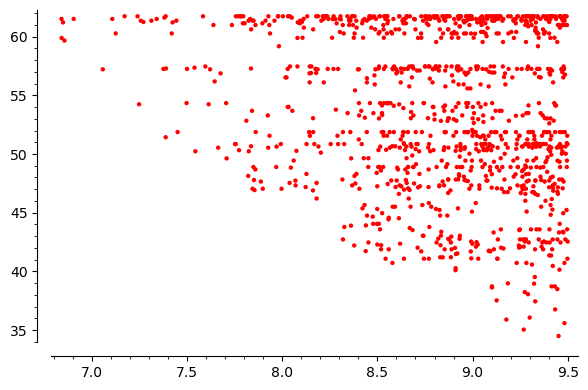

In [91]:
Dv2

In [95]:
Galoislabels[0]

'10T39'